,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


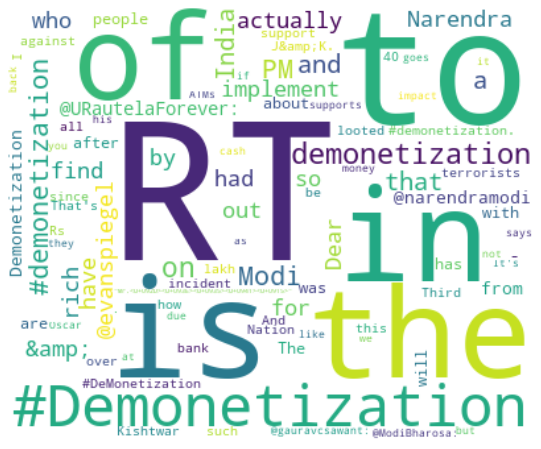

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head()
def gen_freq(text):
    #Will store the list of words
    word_list = []
    global word_freq
    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
import re

def clean_text(text):
   
    text = re.sub(r'RT', '', text)
    pattern=r'[\w]*<[\w]*>[\w]*'
    text=re.sub(pattern," ",text)
    text = re.sub(r'&amp;', '&', text)
    name = "Narendra Modi"
    text = re.sub(name,"Modi",text)
    text=re.sub(r'<[\w]>*' ,' ',text)
    text=re.sub(r'<[\d]{2}>*<[\w]*<[\d]{1}>*' ,' ',text)
    text = re.sub(r'[?!.;:,#@-]', '', text)

    
    text = text.lower()
    return text

In [25]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'above', 'she', 'in', 'had', 'both', 'for', "you'll", 'all', 'once', 'out', 'doing', 'we', "i've", 'because', 'ought', "what's", 'while', 'you', 'could', "weren't", 'during', 'cannot', "can't", 'few', 'what', "couldn't", 'is', 'yourself', 'most', 'r', 'who', "here's", 'this', 'also', "you'd", "i'll", 'be', "she's", 'between', 'he', "you've", 'having', "when's", 'however', "we'll", "doesn't", 'k', 'do', 'me', "shouldn't", "wasn't", 'against', 'being', 'then', 'which', 'nor', "don't", 'ours', 'a', 'my', 'your', 'more', 'by', 'just', "we're", 'like', "won't", "he'd", 'not', "he'll", 'with', 'her', 'or', 'than', 'did', 'www', 'theirs', "you're", 'very', 'off', 'down', 'again', "how's", 'their', "mustn't", 'over', 'under', 'was', 'ourselves', "wouldn't", 'yours', 'each', "she'd", 'some', 'through', "they'd", 'and', 'it', 'to', 'here', 'as', "isn't", 'no', 'itself', 'other', 'of', 'where', "haven't", "they're", "why's", 'same', 'into', 'have', 'that', 'get', 'but', "he's", "let's", 'at', 'h

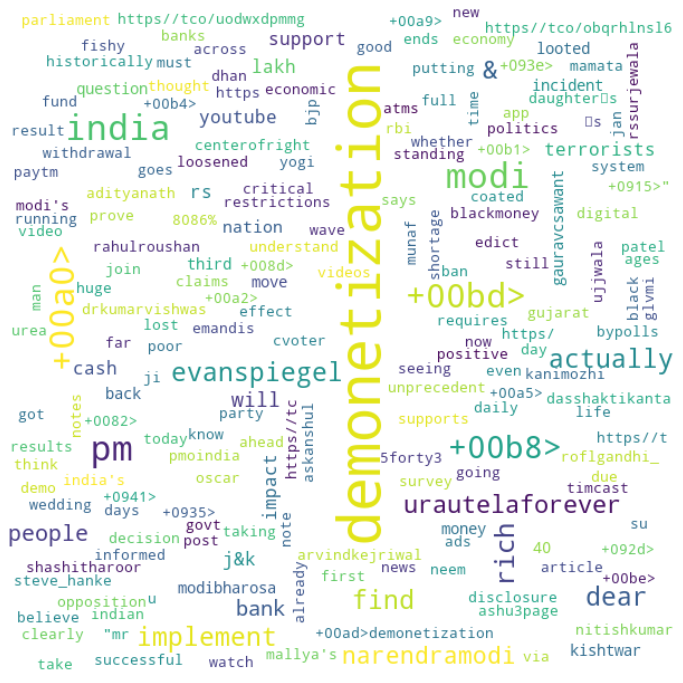

In [34]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=600, height=600, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()